In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('currents/GOOG.pkl')

df.Value = df.Value.astype(float)

In [3]:
df.columns

Index(['Value', 'Account', 'Category', 'Period', 'ContextID',
       'isStartEndPeriod', 'isInstantPeriod', 'isForeverPeriod',
       'startDateTime', 'endDateTime'],
      dtype='object')

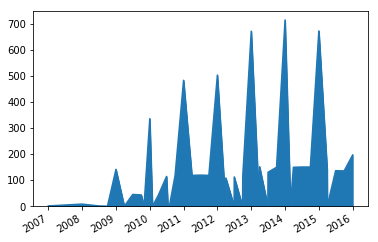

In [14]:
df[(df.isInstantPeriod) & (df.Category==False)].endDateTime.value_counts().sort_index().plot(kind='area')

In [15]:
df[(df.Category==False)].Account.unique().tolist()

[dei:EntityPublicFloat,
 us-gaap:CashAndCashEquivalentsAtCarryingValue,
 us-gaap:Assets,
 us-gaap:CommonStockParOrStatedValuePerShare,
 us-gaap:CommonStockSharesAuthorized,
 us-gaap:CommonStockSharesIssued,
 us-gaap:CommonStockSharesOutstanding,
 us-gaap:CommonStockValue,
 us-gaap:AccumulatedOtherComprehensiveIncomeLossNetOfTax,
 us-gaap:DeferredTaxLiabilitiesNoncurrent,
 us-gaap:AccountsPayable,
 us-gaap:AdditionalPaidInCapitalCommonStock,
 us-gaap:AllowanceForDoubtfulAccountsReceivableCurrent,
 us-gaap:AccountsReceivableNetCurrent,
 us-gaap:AccruedIncomeTaxesPayable,
 us-gaap:AccruedLiabilities,
 us-gaap:AssetsCurrent,
 us-gaap:ConvertiblePreferredStockNonredeemableOrRedeemableIssuerOptionValue,
 us-gaap:ConvertiblePreferredStockParStatedValuePerShare,
 us-gaap:ConvertiblePreferredStockSharesAuthorized,
 us-gaap:ConvertiblePreferredStockSharesIssued,
 us-gaap:ConvertiblePreferredStockSharesOutstanding,
 us-gaap:DeferredRevenueCurrent,
 us-gaap:DeferredRevenueNoncurrent,
 us-gaap:Defe

In [5]:
fulldateaccounts = (lambda x: x[x>=26].index)(df[df.isPeriod==False].Account.value_counts())

In [6]:
fulldateaccounts

Index(['goog:PrepaidRevenueShareExpensesAndOtherAssetsNoncurrent',
       'us-gaap:AccountsReceivableNetCurrent',
       'us-gaap:CashAndCashEquivalentsAtCarryingValue',
       'us-gaap:StockholdersEquity', 'us-gaap:Goodwill',
       'us-gaap:RetainedEarningsAccumulatedDeficit',
       'us-gaap:LiabilitiesCurrent', 'us-gaap:OtherLiabilitiesNoncurrent',
       'us-gaap:LiabilitiesAndStockholdersEquity', 'goog:AccruedRevenueShare',
       'us-gaap:Assets', 'us-gaap:AssetsCurrent',
       'us-gaap:DeferredRevenueCurrent',
       'us-gaap:AllowanceForDoubtfulAccountsReceivableCurrent',
       'us-gaap:PropertyPlantAndEquipmentNet',
       'us-gaap:AccumulatedOtherComprehensiveIncomeLossNetOfTax',
       'us-gaap:DeferredRevenueNoncurrent',
       'us-gaap:AccruedLiabilitiesCurrent',
       'us-gaap:LiabilityForUncertainTaxPositionsNoncurrent',
       'us-gaap:AccountsPayableCurrent', 'us-gaap:DeferredTaxAssetsNetCurrent',
       'us-gaap:OtherLongTermInvestments',
       'us-gaap:EmployeeR

In [7]:
df_fulldates = df[df.Account.isin(fulldateaccounts)][['Value','Account','Start']].pivot_table('Value','Start','Account')

In [13]:
df_fulldates.to_excel('df_fulldates_AMD.xlsx')

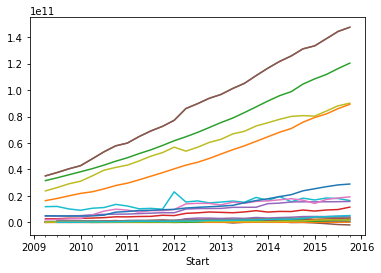

In [8]:
ax = df_fulldates.plot(legend=False)

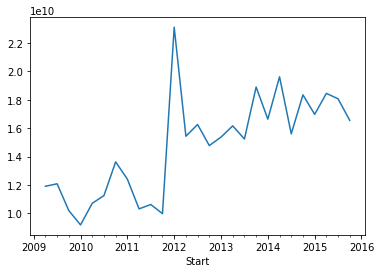

In [9]:
df[df.Account=='us-gaap:CashAndCashEquivalentsAtCarryingValue'].set_index('Start').Value.plot()

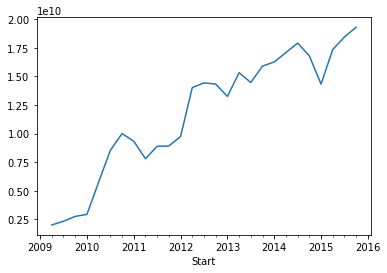

In [10]:
df[df.Account=='us-gaap:LiabilitiesCurrent'].set_index('Start').Value.plot()

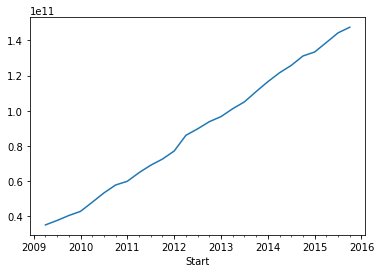

In [11]:
df[df.Account=='us-gaap:Assets'].set_index('Start').Value.plot()

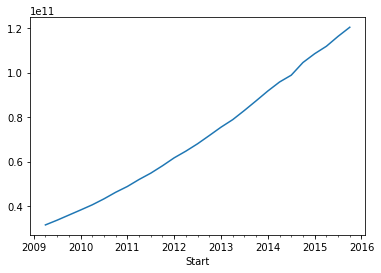

In [12]:
df[df.Account=='us-gaap:StockholdersEquity'].set_index('Start').Value.plot()

In [13]:
netincome = df[df.End.dt.year>=2010].query("Account=='us-gaap:NetIncomeLoss'").sort_values('End')

In [14]:
def calc_quarterly_value(df):
    df = df[df.End.dt.year>=2010]
    df['year_row'] = df.End.dt.month==12
    df['ValueQtrly'] = [df_t.Value if not df_t.year_row else df_t.Value - df.Value.iloc[i-3:i].sum() for i, df_t in df.iterrows()]
    return df

In [15]:
netincome = calc_quarterly_value(netincome)

In [16]:
netincome

,Value,Account,Category,Period,ContextID,isStartEndPeriod,isInstantPeriod,isForeverPeriod,Start,End,isPeriod,Days,PeriodCategory,year_row,ValueQtrly
232,1.955000e+09,us-gaap:NetIncomeLoss,False,2010-01-012010-03-31,eol_PE633170--1010-Q0003_STD_90_20100331_0,True,False,False,2010-01-01,2010-03-31,True,89.0,current_period,False,1.955000e+09
305,1.840000e+09,us-gaap:NetIncomeLoss,False,2010-04-012010-06-30,eol_PE633170--1010-Q0006_STD_91_20100630_0,True,False,False,2010-04-01,2010-06-30,True,90.0,current_period,False,1.840000e+09
453,2.167000e+09,us-gaap:NetIncomeLoss,False,2010-07-012010-09-30,eol_PE633170--1010-Q0009_STD_92_20100930_0,True,False,False,2010-07-01,2010-09-30,True,91.0,current_period,False,2.167000e+09
659,8.505000e+09,us-gaap:NetIncomeLoss,False,2010-01-012010-12-31,eol_PE633170--1010-K0013_STD_365_20101231_0,True,False,False,2010-01-01,2010-12-31,True,364.0,current_period,True,8.505000e+09
922,1.798000e+09,us-gaap:NetIncomeLoss,False,2011-01-012011-03-31,eol_PE633170--1110-Q0004_STD_90_20110331_0,True,False,False,2011-01-01,2011-03-31,True,89.0,current_period,False,1.798000e+09
1104,2.505000e+09,us-gaap:NetIncomeLoss,False,2011-04-012011-06-30,eol_PE633170--1110-Q0010_STD_91_20110630_0,True,False,False,2011-04-01,2011-06-30,True,90.0,current_period,False,2.505000e+09
1258,2.729000e+09,us-gaap:NetIncomeLoss,False,2011-07-012011-09-30,eol_PE633170--1110-Q0014_STD_92_20110930_0,True,False,False,2011-07-01,2011-09-30,True,91.0,current_period,False,2.729000e+09
2073,2.729000e+09,us-gaap:NetIncomeLoss,False,2011-07-012011-09-30,eol_PE633170--1210-Q0014_STD_92_20110930_0,True,False,False,2011-07-01,2011-09-30,True,91.0,current_period,False,2.729000e+09
2286,9.737000e+09,us-gaap:NetIncomeLoss,False,2011-01-012011-12-31,eol_PE633170--1210-K0019_STD_365_20111231_0,True,False,False,2011-01-01,2011-12-31,True,364.0,current_period,True,9.737000e+09
1449,9.737000e+09,us-gaap:NetIncomeLoss,False,2011-01-012011-12-31,eol_PE633170--1110-K0018_STD_365_20111231_0,True,False,False,2011-01-01,2011-12-31,True,364.0,current_period,True,9.737000e+09


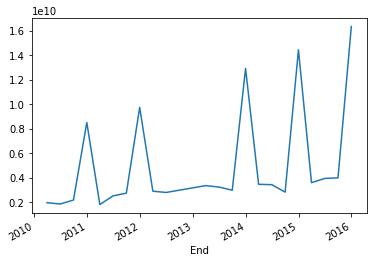

In [18]:
netincome.set_index('End').Value.plot()